In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# download the data and split into train and test sets
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Explore the data dimensions
print('Image dimensions : '+str(train_images.shape[1])+' x '+str(train_images.shape[2]))
print('Number of training examples : '+str(len(train_images)))
print('Number of testing examples : '+str(len(test_images)))

Image dimensions : 28 x 28
Number of training examples : 60000
Number of testing examples : 10000


In [3]:
# create a list of all class names 
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

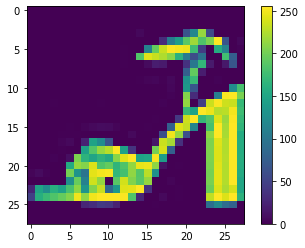

In [4]:
# display a random image from the training data
plt.figure()
plt.imshow(random.choice(train_images))
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
# Normalize the scale of the images
train_images = train_images  / 255.0
test_images = test_images / 255.0

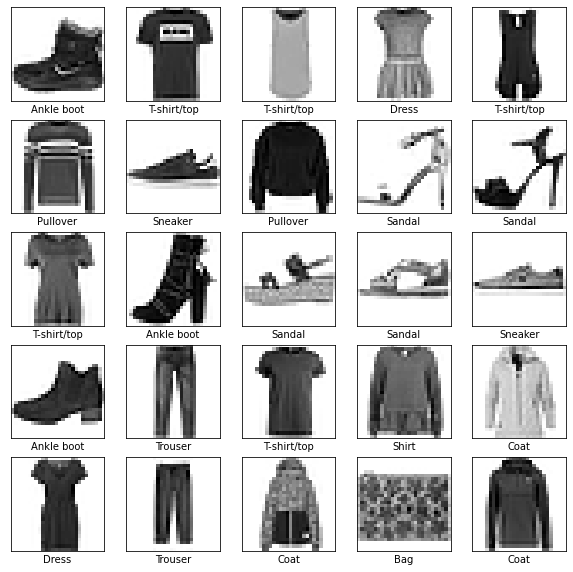

In [6]:
# display some images and their respective labels after normalization
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
# build a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [8]:
# compile the model for the fit function
model.compile(
    optimizer='adam', # choose the optimizer 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # choose the training loss
    metrics=['accuracy'] # choose the metrics to evaluate the model on 
)

In [9]:
# train the model 
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 979us/step - loss: 0.4961 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 2s 975us/step - loss: 0.3750 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3351 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3125 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2934 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 2s 993us/step - loss: 0.2790 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.2659 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 2s 967us/step - loss: 0.2543 - accuracy: 0.9057
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2462 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - l

In [10]:
# evaluate the model 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3291 - accuracy: 0.8844

Test accuracy: 0.8844000101089478


In [11]:
# add a softmax layer to the trained model for final predictions
model =  tf.keras.Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [12]:
# predict the labels from the test images
predictions = model.predict(test_images)

In [13]:
# define some helper functions to plot our outputs

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


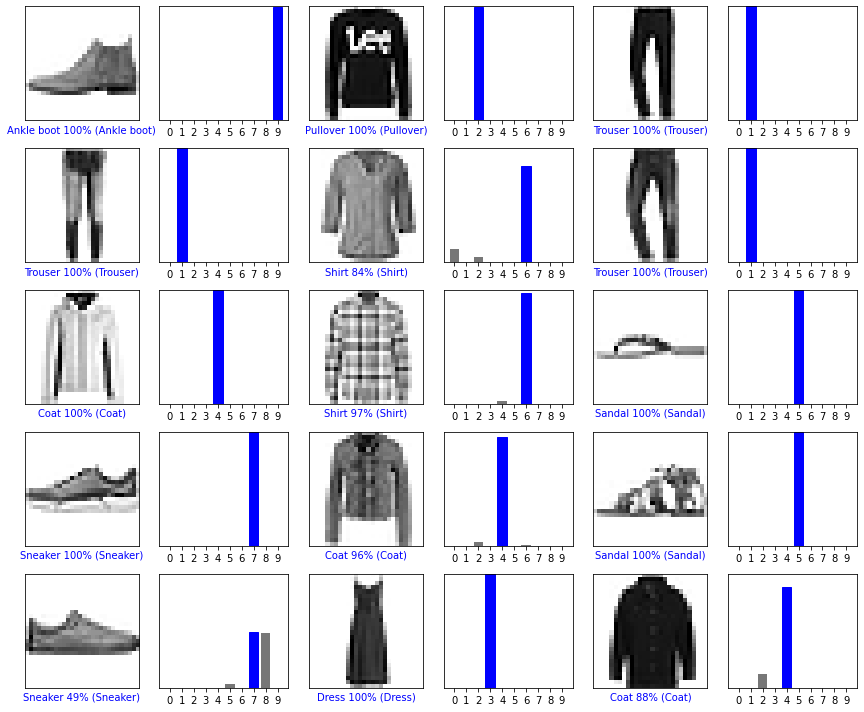

In [14]:
# display some predictions and their results
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

References:
    [1]. https://www.tensorflow.org/tutorials/keras/classification